# Modellare una distribuzione

Le distribuzioni che abbiamo visto sino ad ora sono chiamate **distribuzioni empiriche** perchè sono basate su osservazioni empiriche e su un campione necessariamente finito.

Empirico:<br/>
Fondato sui dati dell'esperienza immediata e della pratica, quindi estraneo al rigore scientifico e per questo generalmente sconsigliabile.

L'alternativa è una **distribuzione analitica**, che è caratterizzata da un funzione di ripartizione espressa come funzione matematica. 
La distribuzione analitica può essere usata per modellare le distribuzioni analitiche. In questo contesto un **modello** è una semplificazione che tralascia i dettagli non necessari.

In questo capitolo presentiamo le più comuni distribuzioni analitiche e useremo queste per modellare i dati da varie sorgenti.

## La distribuzione esponenziale

Partiamo con la distribuzione più semplice la **distribuzione esponenziale** la funzione di ripartizione CDF può essere scritta in questo modo:

$$CDF(x) = 1- e^{-\lambda x}$$

il parametro $\lambda$ determina la figura della ditribuzione qui sotto un esempio con $\lambda$ impostato a 0.5,1 e 2

Text(0.5, 1.0, 'Exponential CDF')

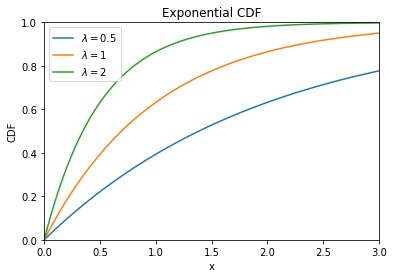

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,3,100)
for lam in [0.5,1,2]:
    y = 1 - np.exp(-lam * x)
    label = '$\lambda={0}$'.format(lam)
    plt.plot(x,y,label=label)
    
plt.legend(loc='upper left')
plt.xlim(0,3)
plt.ylim(0,1)
plt.xlabel("x")
plt.ylabel("CDF")
plt.title("Exponential CDF")

Nel mondo reale la distribuzione esponenziale viene ottenuta quando si guarda una serie di eventi e si misura il tempo tra gli stessi (**intertempi**).
Se gli eventi hanno la stessa probabilità di avvenire in qualsiasi momento, la distribuzione degli intertempi tende ad assomigliare ad una distribuzione esponenziale.

Ma vediamo subito un esempio, osserviamo i tempi di nascita tra un bebè e un altro in un ospedale.
Il giorno 18 Dicembre in un ospedale di Brisbane, Australia sono nati 44 bambini. I tempi di nascita di tutti i 44 bambini sono stati riportati sul giornale locale.

Cominciamo con il leggere il dataset.

In [2]:
from utils import readBabyBoom,calcCdf
import pandas as pd
df = readBabyBoom()
diff = df.minutes.diff()
df['diff'] = df.minutes.diff().fillna(0)

In [3]:
values,pmf,cdf = calcCdf(df['diff'])

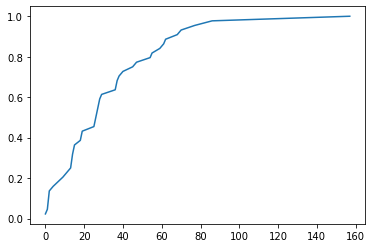

In [4]:
plt.plot(values,cdf)

La colonna *diffs* rappresenta le differenze tra due nascite consecutive e cdf rappresenta la distribuzione degli intertempi.
La distribuzione sembra essere una funzione esponenziale ma come facciamo ad esserne sicuri ?

Un modo potrebbe essere quello di stampare il **grafico complementare al CDF** che può essere espresso tramite la funzione 1-CDF(x) con l'asse y impostato su una scala logaritmica.

Per una distribuzione di tipo esponenziale il risultato sarà una retta.

Vediamo il risultato


Text(0, 0.5, 'CCDF')

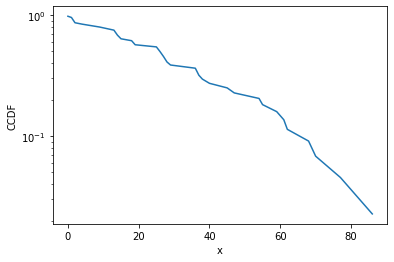

In [5]:
ccdf = 1.0 - cdf

#filtraggio dati
is_correct =  values < 157.0
ccdf = ccdf[is_correct]
values = values[is_correct]

plt.plot(values,ccdf)

plt.yscale("log")
plt.xlabel("x")
plt.ylabel("CCDF")

La figura sopra mostra che la riga non è perfettamente dritta, dunque la distribuzione esponenziale non modella perfettamente questi dati.

Molto probabilmente l'ipotesi di fondo (le nascite hanno la stessa probabilità durante tutto il giorno) non è del tutto corretta. 

Tuttavia può essere ragionevole modellare questo dataset con una distribuzione esponenziale. Con questa semplificazione possiamo riassumere la distribuzione con un singolo parametro. Il parametro $\lambda$ può essere interpretato come un tasso, cioè il numero di eventi, in media, in una unità di tempo.

In questo esempio 44 bambini sono nati in 24 ore, dunque il tasso di nascita è  pari a $\lambda = 0.0306$ bambini per minuto.
La media di una distribuzione esponenziale è pari a $\frac{1}{\lambda}$, tradotto sul nostro caso abbiamo che il tempo medio che trascorre tra una nascita e l'altra è pari a 32.7 minuti.

## La distribuzione normale
La distribuzione **normale** anche chiamata Gaussiana è molto usata in quanto descrive molti fenomeni, almeno approssimativamente. Scopriremo più avanti che c'è una buona ragione di questa omnipresenza, ci arriveremo con il Teorema del limite centrale.

La distribuzione normale è caratterizzata da due parametri:

* La media $\mu$
* La deviazione standard $\sigma$

La distribuzione normale con media $\mu = 0$ e deviazione standard $\sigma = 1$ è anche chiamata **distribuzione normale standard**.

La sua funzione di ripartizione è definita da un integrale che non ha una soluzione in forma chiusa, ci sono però algoritmi che la valutano in modo molto efficiente.

Una di queste soluzioni ci arriva da `scipy.stats.norm` che essenzialmente è un oggetto rappresentante la distribuzione normale.

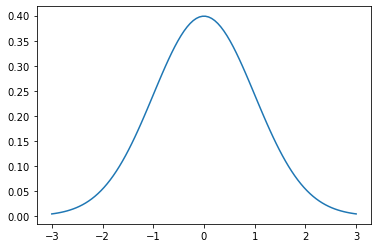

In [6]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt


mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma))

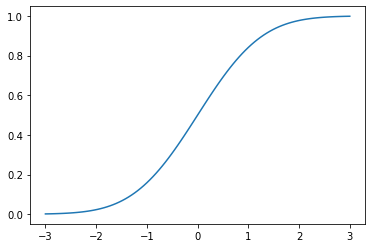

In [7]:
plt.plot(x, norm.cdf(x, mu, sigma))

Nel capitolo precedente abbiamo osservato la distribuzione dei pesi neonati analizziamo ora se è possibile riassumere la distribuzione con una distribuzione normale.

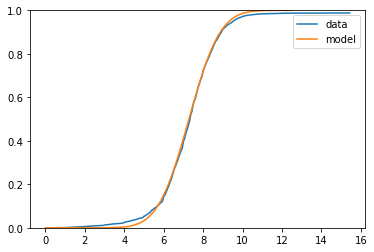

In [8]:
from utils import readReadFemPreg

preg = readReadFemPreg()
live = preg[preg.outcome == 1]

values,pmf,cdf = calcCdf(live['totalwgt_lb'])

plt.plot(values,cdf, label='data')

mu = 7.28
sigma = 1.24
low = 0
high = 12.5

xs = np.linspace(low, high, 100)
ps = norm.cdf(xs, mu, sigma)

plt.plot(xs,ps, label='model')

plt.ylim(0,1)
plt.legend(loc='upper right')

Come si vede la distribuzione normale è un buon modello per questo datase, dunque possiamo riassumere la distribuzione con i parametri $\mu = 7.28$ e $\sigma = 1.24$, con un errore molto ridotto.

Sotto il decimo percentile ci sono delle discrepanze sul modello, ci sono più bambini leggeri di quanti la distribuzione normale ne preveda. Se siamo particolarmente interessati all'analisi dei nati prematuri sarà importante che questa parte della distribuzione sia rispettata. Potrebbe non essere appropriato usare una distribuzione normale.

### Grafico di probabilità normale

Per la ditribuzione esponenziale, e per poche altre, ci sono delle semplici trasformazioni che possiamo usare per testare se la distribuzione analitica può essere un buon modello per il dataset.

Per la distribuzione normale non c'è nessuna trasformazione, abbiamo comunque una alternativa chiamata **Grafico di probabilità normale**.

Ci sono due modi per generare il grafico, noi prenderemo la strada più semplice.

* ordinare i valori nel campione
* dalla distribuzione normale generare un campione random della stessa dimensione e ordinarlo
* creare un grafico dei valori ordinati che mostra il rapporto tra il nostro campione e quello della distribuzione normale

se la distribuzione dei campioni approssima una distribuzione normale il risultato sarà una linea.
Analizziamo il risultato

In [9]:
def normalProbability(sample):
    n = len(sample)
    xs = np.random.normal(0, 1, n)
    xs.sort()
    
    
    ys = np.array(sample)
    ys.sort()

    return xs, ys

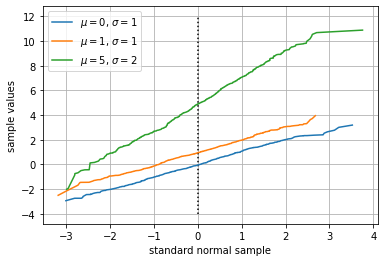

In [10]:
n = 1000
mus = [0, 1, 5]
sigmas = [1, 1, 2]
for mu, sigma in zip(mus, sigmas):
    sample = np.random.normal(mu, sigma, n)
    xs, ys = normalProbability(sample)
    label = '$\mu=%d$, $\sigma=%d$' % (mu, sigma)
    plt.plot(xs,ys, label=label)
    
plt.legend(loc='upper left')
plt.ylabel("sample values")
plt.xlabel("standard normal sample")
plt.vlines(0, -4, 12, linestyles ="dotted", colors ="k")
plt.grid(True)

Il grafico mostrato evidenzia come la lina sia quasi dritta, le deviazioni più grandi le abbiamo alle estremità.
Proviamo ora con dei dati reali, generiamo il grafico analizzando il peso dei bambini.

In [11]:
def fitline(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

In [12]:
from utils import readReadFemPreg

preg = readReadFemPreg()
full_term = preg[preg.prglngth >= 37]

weights = preg.totalwgt_lb.dropna()
term_weights = full_term.totalwgt_lb.dropna()

Mean 7.27 Standard deviation 1.41


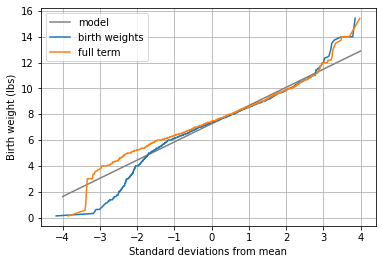

In [13]:
mean = weights.mean()
std = weights.std()

print("Mean {0:.2f} Standard deviation {1:.2f}".format(mean,std))

xs = [-4, 4]
fxs,fys = fitline(xs,mean,std)
plt.plot(fxs,fys, label='model',color='gray')

xs, ys = normalProbability(weights)
plt.plot(xs,ys, label='birth weights')

xs, ys = normalProbability(term_weights)
plt.plot(xs,ys, label='full term')

plt.legend(loc='upper left')
plt.ylabel("Birth weight (lbs)")
plt.xlabel("Standard deviations from mean")
plt.grid(True)

il metodo `fitline` prende una sequenza di di valori i parametri della retta che rappresenta la distribuzione e crea la linea.
il metodo `normalProbability`confronta la distribuzione normale con la nostra distribuzione dei valori. Entrambe le distribuzioni combaciano quando siamo vicini alla media e divergono man mano che ci allontaniamo, i bambini pesanti tendono ad essere più pesanti del previsti e quelli più leggeri tendono ad essere più leggeri del previsto.

Abbiamo fatto anche un passo ulteriore abbiamo selezionato i bambini nati a termine correttamente e come mostra la linea arancione questo riduce la discrepanza tra il modello e il dato osservato.

Il grafico mostra come il modello basato sulla distribuzione normale modelli bene i dati entro qualche deviazione standard alla media ma non verso la coda.

Comunque è abbastanza buono per i nostri scopi.

## La distribuzione lognormale

Se il logaritmo dell'insieme dei valori ha una distribuzione normale siamo di fronte ad una **distribuzione lognormale**.
La funzione di ripartizione di questa distribuzione è la stessa della distribuzione normale solo che al posto di x ci troviamo log x

$$CDF_{lognormal}(x) = CDF_{normal}(log(x))$$

Abbiamo ancora i parametri $\mu$ e $\sigma$ ma questi non rappresentano più la media e la deviazione standard. La media di questa distribuzione si denota in questo modo:

$$e^{\mu + \frac{\sigma^{2}}{2}}$$

la deviazione standard è ancora più complicata, si veda l'[articolo wikipedia](https://it.wikipedia.org/wiki/Distribuzione_lognormale)

Se il campione approssima una distribuzione lognormale si può visualizzare il grafico cambiando l'asse x in logaritmica.
Come esempio controlliamo la distribuzione dei pesi di un adulto, che si può approssimare bene con una distribuizone lognormale.

I dati sono stati presi dal National Center for Chronic Disease Prevention and Healt Promotion tramite un sondaggio che fa parte del Behavioral Factor Surveillance System (BRFSS).
Nel 2008 sono stati intervistati 414.509 persone sul loro stato di salute, di questi 398.484 hanno dato le informazioni relative al loro peso.

In [14]:
from utils import readBrfss
import math
import matplotlib.pyplot as plt
df = readBrfss()

In [15]:
dfw = df.dropna(subset = ['wtkg2']).copy()
dfw['log_weights'] = np.log10(dfw['wtkg2'])

mean = dfw['wtkg2'].mean()
var = dfw['wtkg2'].var()

std = math.sqrt(var)

std = math.sqrt(var)
print('Num elements {0} mean {1:.2f} standard dev {2:.2f}'.format(len(weights), mean, std))

values,pmf,cdf = calcCdf(dfw['wtkg2'])

Num elements 9038 mean 78.99 standard dev 19.55


In [16]:
from scipy import stats
def renderNormalCdf(mu, sigma, low, high, n=101):
    xs = np.linspace(low, high, n)
    ps = stats.norm.cdf(xs, mu, sigma)
    return xs, ps

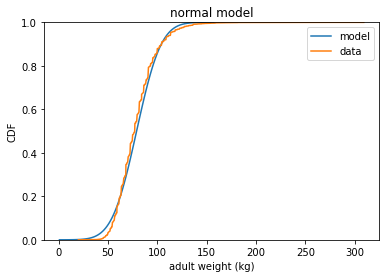

In [17]:
xmin = mean - 4 * std
xmax = mean + 4 * std

xs, ps = renderNormalCdf(mean, std, xmin, xmax)
plt.plot(xs,ps, label='model')
plt.plot(values,cdf, label='data')

plt.xlabel('adult weight (kg)')
plt.ylabel('CDF')
plt.title('normal model')
plt.ylim(0,1)
plt.legend(loc='upper right')

Provamo ora ad utilizzare una scala logaritmica, notoremo che la curva si adatta meglio al dataset.

Num elements 9038 mean 1.89 standard dev 0.10


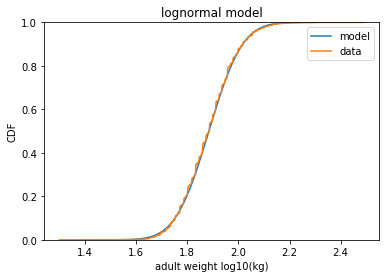

In [18]:
mean = dfw['log_weights'].mean()
var = dfw['log_weights'].var()

std = math.sqrt(var)
print('Num elements {0} mean {1:.2f} standard dev {2:.2f}'.format(len(weights), mean, std))

values,pmf,cdf = calcCdf(dfw['log_weights'])


xmin = mean - 4 * std
xmax = mean + 4 * std

xs, ps = renderNormalCdf(mean, std, xmin, xmax)
plt.plot(xs,ps, label='model')
plt.plot(values,cdf, label='data')

plt.xlabel('adult weight log10(kg)')
plt.ylabel('CDF')
plt.title('lognormal model')
plt.ylim(0,1)
plt.legend(loc='upper right')


analizziamo per completezza anche il grafico di probabilità normale

Mean 78.99 Standard deviation 19.55


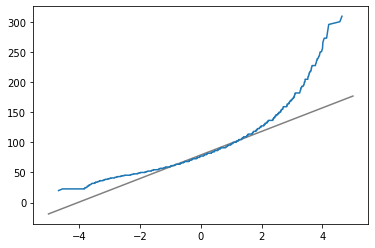

In [19]:
weights = dfw['wtkg2']
mean = dfw['wtkg2'].mean()
var = dfw['wtkg2'].var()

std = math.sqrt(var)

print("Mean {0:.2f} Standard deviation {1:.2f}".format(mean,std))

xs = [-5, 5]
fxs,fys = fitline(xs,mean,std)
plt.plot(fxs,fys, label='model',color='gray')

xs, ys = normalProbability(weights)
plt.plot(xs,ys, label='weights')

Mean 1.89 Standard deviation 0.10


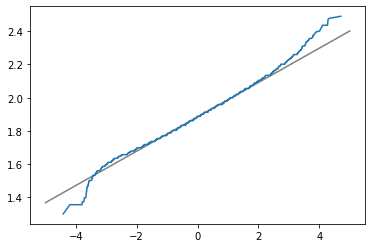

In [20]:
weights = dfw['log_weights']
mean = dfw['log_weights'].mean()
var = dfw['log_weights'].var()

std = math.sqrt(var)

print("Mean {0:.2f} Standard deviation {1:.2f}".format(mean,std))

xs = [-5, 5]
fxs,fys = fitline(xs,mean,std)
plt.plot(fxs,fys, label='model',color='gray')

xs, ys = normalProbability(weights)
plt.plot(xs,ys, label='weights')

Notiamo che le deviazioni sono molto minori e la distribuzione lognormale riassume meglio il dato.
## Distribuzione di Pareto

La [distribuzione di Pareto](https://it.wikipedia.org/wiki/Distribuzione_paretiana) è chiamata in questo modo in onore dell'economista Vilfredo Pareto che la usò per descrivere la distribuzione del reddito.
Da quel momento venne usata poi per descrivere anche altri fenomeni naturali e sociologici.

La funzione di ripartizione può essere scritta in questo modo:

$$CDF(x) = 1 - \left( \frac{x}{x_m} \right)^{-\alpha}$$

I parametri $x_m$ e $\alpha$ determinano la posizione e la forma della distribuzione, $x_m$ rappresenta il valore minimo.
La figura qui sotto mostra l'andamento della funzione al variare di $\alpha$ con $x_m$ impostato a 0.5

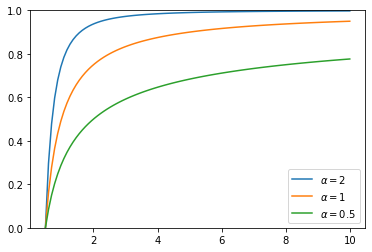

In [21]:
xmin = 0.5


def renderParetoCDF(xmin, alpha, low, high, n=50):
    if low < xmin:
        low = xmin
    xs = np.linspace(low, high, n)
    ps = 1 - (xs / xmin) ** -alpha
    #ps = stats.pareto.cdf(xs, scale=xmin, b=alpha)
    return xs, ps


for alpha in [2.0, 1.0, 0.5]:
    xs, ps = renderParetoCDF(xmin, alpha, 0, 10.0, n=100)
    plt.plot(xs,ps, label=r'$\alpha=%g$' % alpha)

    plt.ylim(0,1)
    plt.legend(loc='lower right')

C'è un semplice test visuale per verificare se una distruzione empirica può essere riassunta con una distribuzione di pareto, su una scala log-log, il CCDF (visto precedentemente) assomiglia ad una linea continua.
Mostriamo un esempio.

Se visualizziamo su un grafico CCDF la funzione di pareto diventerà

$$y \approx \left( \frac{x}{x_m} \right)^{-\alpha}$$

Ora se applichiamo la funzione logaritmo ad entrambe le parti otterremo che:

$$log(y) \approx -\alpha(log(x) - log(x_m))$$

Dunque se mostriamo in un grafico $log(y)$ contro $log(x)$ otteremo una linea retta con pendenza $-\alpha$ e punto di intersezione $\alpha log(x_m)$

Come esempio andiamo a confrontare la dimensione delle citta e dei paesi,L'ufficio del censimento americano pubblica la popolazione di ogni città e paese degli stati uniti.



Number of cities/towns 19515


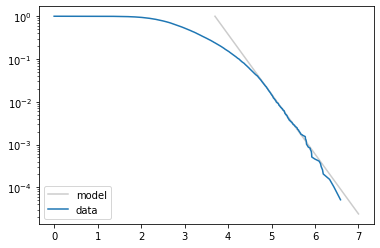

In [22]:
from utils import readPopulation

pops = readPopulation()
print('Number of cities/towns', len(pops))

log_pops = np.log10(pops)

values,pmf,cdf = calcCdf(pops)
values_log,pmf_log,cdf_log = calcCdf(log_pops)

fdata = cdf_log < cdf_log[-1]
cdf_log = cdf_log[fdata]
values_log = values_log[fdata]

xs, ys = renderParetoCDF(xmin=5000, alpha=1.4, low=0, high=1e7)
plt.plot(np.log10(xs), 1-ys, label='model', color='0.8')
plt.plot(values_log, 1 - cdf_log, label='data')
plt.yscale("log")
plt.legend(loc='lower left')

Come vediamo il modello approssima bene tutti i dati sotto al $10^{-2}$, possiamo concludere che la coda viene approssimata bene dal modello di Pareto.

D'altra parte, la distribuzione lognormale modella anche lei i dati, il grafico qui sotto mostra la funzione di ripartizione della funzione lognormale

Mean 3.14 Standard deviation 0.80


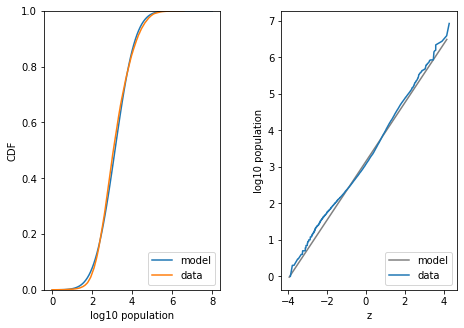

In [24]:
mu, sigma = log_pops.mean(), log_pops.std()
print("Mean {0:.2f} Standard deviation {1:.2f}".format(mu,sigma))


xns, ps = renderNormalCdf(mu,sigma, 0, 8)

xlim=[-5, 5]
fxs,fys = fitline(xs,mu,sigma)
xs, ys = normalProbability(log_pops)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,5))

fig.tight_layout(pad=3.0)

ax1.plot(xns,ps, label='model')
ax1.plot(values_log,cdf_log, label='data')
ax1.set_xlabel("log10 population")
ax1.set_ylabel("CDF")
ax1.set_ylim([0,1])
ax1.legend(loc='lower right')

ax2.plot(fxs,fys, label='model',color='gray')
ax2.plot(xs,ys, label='data')
ax2.set_xlabel("z")
ax2.set_ylabel("log10 population")
ax2.legend(loc='lower right')

Nessuna delle due distribuzioni è perfetta, il modello di Pareto si applica solo al 1% delle citta più grandi ma di adatta molto bene a quella parte della distribuzione, mentre il modello lognormale si applica bene al restante 99%.

La scelta del modello dipende da quale delle due parti si vuol analizzare

## Perchè modellare?

All'inizio abbiamo detto che molti fenomeni del mondo reali possono essere modellati con una distribuzione analitica.
Ora la domanda viene spontanea, perchè ?

Come tutti i modelli, le distribuzioni analitiche sono astrazioni, questo significa che tralasciano dei dettagli che possono essere non rilevanti.
Per esempio misurando possiamo commettere degli "errori di misura", i modelli analitici smussano queste idiosincrasie.

I modelli analitici sono anche una forma di compressione dei dati. Quando un modello si adatta bene ad un dataset possiamo riassumere un dataset con un piccolo insieme di parametri.

E' sorpendente quando i dati di un particolare fenomeno si adattano ad una distribuzione analitica. 
Qualche volta possiamo spiegare come una distribuzione osservata ben si adatta ad una distribuzione analitica.
Per esempio la distribuzione di Pareto ben si adatta ai processi generativi con feedback positivo.

E' importante ricordare che tutti i modelli sono imperfetti. I dati del mondo reale non si adatteranno mai perfettamente ad una distribuzione analitica.